In [1]:
from scipy.stats import norm

mu = 42
sigma = 8

# Convert to z-scores
z1 = (20 - mu) / sigma
z2 = (30 - mu) / sigma

# Find probability between z1 and z2
prob = norm.cdf(z2) - norm.cdf(z1)
print(f"Probability Z-Phone lasts between 20 and 30 months: {prob:.4f}")


Probability Z-Phone lasts between 20 and 30 months: 0.0638


In [2]:
import numpy as np

data = [75, 63, 100, 36, 51, 45, 80, 90]  # Treat 100+ as 100 for median
median = np.median(data)
print(f"Estimated median survival time: {median} hours")

Estimated median survival time: 69.0 hours


In [3]:
n = 250
x_bar = 34.5
y_bar = 147.0
sum_x2 = 314625
sum_xy = 1305000

Sxy = sum_xy - n * x_bar * y_bar
Sxx = sum_x2 - n * x_bar**2

slope = Sxy / Sxx
intercept = y_bar - slope * x_bar

print(f"Regression Line: y = {intercept:.2f} + {slope:.2f}x")

# Predict weight at age 25
x_pred = 25
y_pred = intercept + slope * x_pred
print(f"Predicted weight for 25-year-old: {y_pred:.2f} lbs")

# Residual if observed weight = 170
y_obs = 170
residual = y_obs - y_pred
print(f"Residual: {residual:.2f} lbs")

# Under or Overestimate?
if residual > 0:
    print("Underestimate: Actual weight is more than predicted.")
else:
    print("Overestimate: Actual weight is less than predicted.")


Regression Line: y = 71.93 + 2.18x
Predicted weight for 25-year-old: 126.33 lbs
Residual: 43.67 lbs
Underestimate: Actual weight is more than predicted.


Fuel A Mean: 2.42, Variance: 0.2854, Std Dev: 0.5342


/tmp/ipython-input-4-3156452957.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fuel_a, fuel_b], labels=["Fuel A", "Fuel B"])


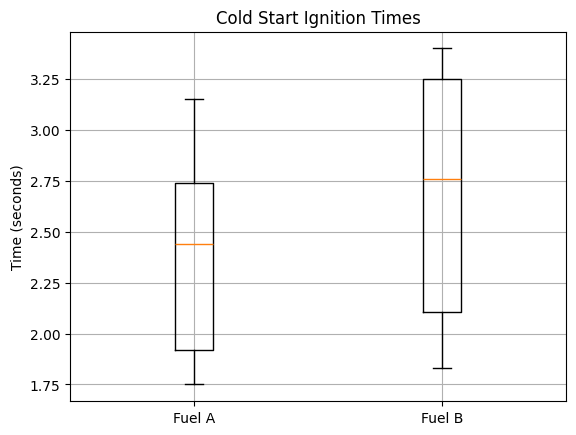

In [4]:
import matplotlib.pyplot as plt

fuel_a = [1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91]
fuel_b = [1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35]

mean_a = np.mean(fuel_a)
var_a = np.var(fuel_a, ddof=1)
std_a = np.std(fuel_a, ddof=1)

print(f"Fuel A Mean: {mean_a:.2f}, Variance: {var_a:.4f}, Std Dev: {std_a:.4f}")

plt.boxplot([fuel_a, fuel_b], labels=["Fuel A", "Fuel B"])
plt.title("Cold Start Ignition Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

Degree 1 Polynomial MSE: 15.55


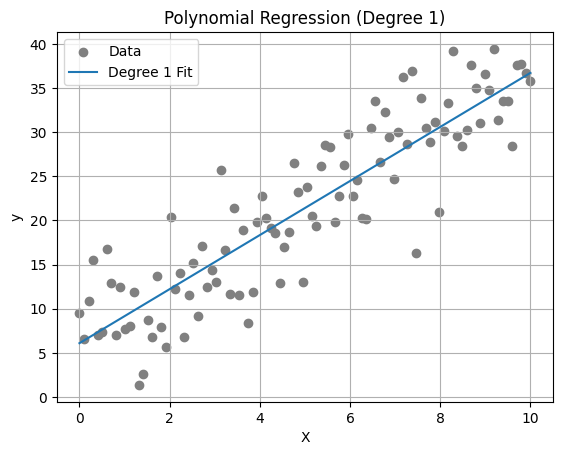

Degree 2 Polynomial MSE: 15.49


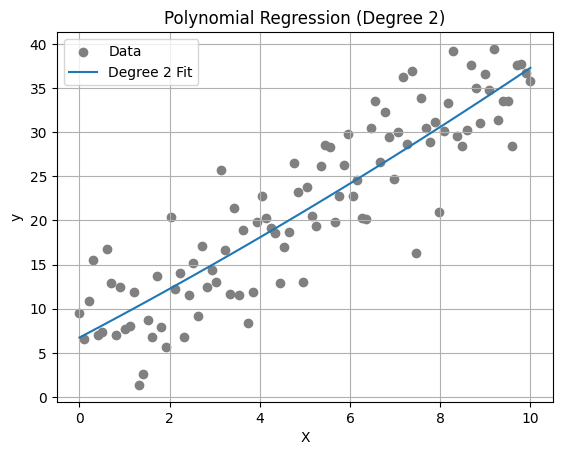

Degree 3 Polynomial MSE: 15.06


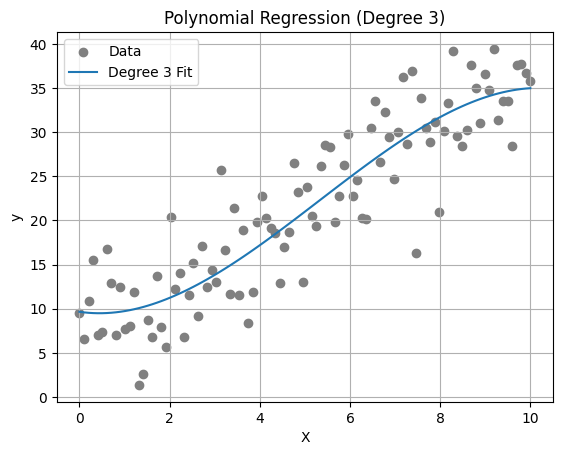

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# a. Generate Data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 7 + np.random.normal(0, 5, size=X.shape)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_plot(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {degree} Polynomial MSE: {mse:.2f}")

    X_all = np.linspace(0, 10, 100).reshape(-1, 1)
    X_all_poly = poly.transform(X_all)
    y_fit = model.predict(X_all_poly)

    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X_all, y_fit, label=f'Degree {degree} Fit')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

for d in [1, 2, 3]:
    train_and_plot(d)
